<a href="https://colab.research.google.com/github/LikhanInSpace/Pripyat/blob/main/vgg16_test_no_for_25k_image.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/client/session.py:1761: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.5.0


In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]
train_path = '/content/drive/MyDrive/real vs fake/train'
valid_path = '/content/drive/MyDrive/real vs fake/test'

In [4]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)



58892288/58889256 [==============================] - 0s 0us/step


In [5]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [6]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/real vs fake/train/*')

In [7]:
folders

['/content/drive/MyDrive/real vs fake/train/real',
 '/content/drive/MyDrive/real vs fake/train/fake']

In [8]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)

In [9]:
len(folders)

2

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

In [11]:
# view the structure of the model
#model.summary()


In [12]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [13]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [14]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/train',
                                                 target_size = (224, 224),
                                                 batch_size = 100,
                                                 class_mode = 'categorical')

Found 15024 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/real vs fake/test',
                                            target_size = (224, 224),
                                            batch_size = 100,
                                            class_mode = 'categorical')

Found 10000 images belonging to 2 classes.


In [17]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=15,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/15
151/151 [==============================] - 6153s 41s/step - loss: 0.0281 - accuracy: 0.9859 - val_loss: 0.0050 - val_accuracy: 0.9996
Epoch 2/15
151/151 [==============================] - 230s 2s/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0046 - val_accuracy: 0.9991
Epoch 3/15
151/151 [==============================] - 223s 1s/step - loss: 0.0021 - accuracy: 0.9995 - val_loss: 0.0381 - val_accuracy: 0.9839
Epoch 4/15
151/151 [==============================] - 221s 1s/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 0.0111 - val_accuracy: 0.9954
Epoch 5/15
151/151 [==============================] - 221s 1s/step - loss: 9.3889e-04 - accuracy: 0.9998 - val_loss: 0.0080 - val_accuracy: 0.9966
Epoch 6/15
151/151 [==============================] - 221s 1s/step - loss: 6.3684e-04 - accuracy: 0.9999 - val_loss: 0.0041 - val_accuracy: 0.9987
Epoch 7/15
151/151 [==============================] - 221s 1s/step - loss: 5.0137e-04 - accuracy: 0.9999 - val_loss: 0.0076 - val_ac

In [16]:
import matplotlib.pyplot as plt

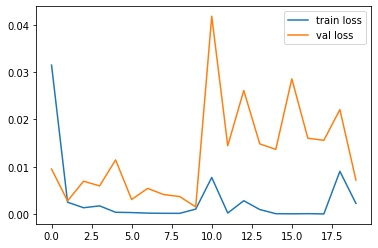

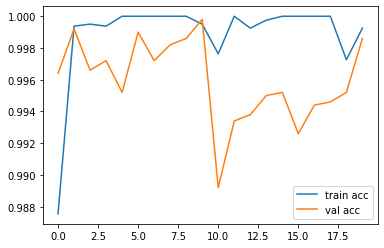

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_vgg16.h5')

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred

array([[1.0000000e+00, 1.3009574e-21],
       [0.0000000e+00, 1.0000000e+00],
       [1.8938615e-16, 1.0000000e+00],
       ...,
       [8.6144044e-28, 1.0000000e+00],
       [9.8812323e-24, 1.0000000e+00],
       [1.0000000e+00, 6.8883776e-24]], dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([0, 1, 1, ..., 1, 1, 0])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_vgg16.h5')